# USA’s unique gun violence problem -  Individual Project

### Individual Project Deceptive Version

The libraries would be needed here are mentioned below. I used the below libraries for first version as well. As the same datasets are being used here to create a deceptive version, with a little addition (explained with each graph) so same set of library needs to be called.

In [1]:
#Important libraries to be imported before code execution
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus


import matplotlib.pyplot as plt

from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot

#Bokeh library imports
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.layouts import layout
from bokeh.layouts import widgetbox
from bokeh.embed import file_html
from bokeh.io import output_notebook
from bokeh.models import Text
from bokeh.models import Plot
from bokeh.models import Slider
from bokeh.models import Circle
from bokeh.models import Range1d
from bokeh.models import CustomJS
from bokeh.models import HoverTool
from bokeh.models import LinearAxis
from bokeh.models import ColumnDataSource
from bokeh.models import SingleIntervalTicker

# testing
import unittest

Populating the interactive namespace from numpy and matplotlib


# Dataset Description 

The dataset that is df which is from the source "unodc small arms survey via the guardian" about Gun violence in the USA.

<ul>
<li> <b> df</b> is Dataviz_Graphs.csv a dataset of small arms survey data in the USA. Source: https://www.atf.gov/about/firearms-trace-data-2015</li> 
<li> <b> df1</b> is a dataset Statistical_Annex_Table.csv Source : https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm, 
https://www.atf.gov/about/firearms-trace-data-2015 ;
<li>Reference:: 
https://ajph.aphapublications.org/doi/abs/10.2105/AJPH.2015.302749 ,
https://data.world/azel/gun-deaths-in-america ,
https://library.stanford.edu/projects/mass-shootings-america ,
http://crowdsourcing-class.org/assignment9.html ,
https://www.atf.gov/resource-center/docs/163524-alatfwebsite15pdf/download, 
https://plot.ly/python/heatmaps/
http://www.smallarmssurvey.org/fileadmin/docs/A-Yearbook/2007/en/Small-Arms-Survey-2007-Chapter-02-annexe-4-EN.pdf.</li>
<li> <b> Graph 2 </b>  <b> </b> is dataset for the third graph using the dataset is similar to Graph 1 except that HDI Index has been used and also the understanding of Rich countries has been reconsidered to address deceptionThe dataset which is obtained from the CDC site (for Graph 1) has been reused. <b>  </b>.
<li> <b> Graph 3 </b>  <b> </b> The dataset which is obtained from the CDC site (for Graph 1) has been reused. And, population country wisse has been added as a new column "pop_per_thousand" using http://www.smallarmssurvey.org/fileadmin/docs/A-Yearbook/2007/en/Small-Arms-Survey-2007-Chapter-02-annexe-4-EN.pdf , 
https://data.worldbank.org/indicator/SP.POP.TOTL, 
https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)  <b> <b></b>.
</ul>

The columns in <b> df </b> are: 
<ol>
<li> State : State in USA, String </li>
<li> Country: Country wise use of firearms , Numeric </li>

<li> Firearm per 1 million pop: % of firarms in population, Numeric </li>
<li> Firearm Data: Raw data for firearms, Numeric </li>
<li> Abbreviations for Countries: String </li>

Pretty much columns are same in other tables with a slight addition of some columns.
</ol>

# Deceptive Graph 1

## Country Wise Data - Data preparation steps:

The dataset Dataviz_Graphs.csv file contains USA Country wise data showing Homicide rates, firearms possession counts and himicide details like firearm per 100 population, % of homicides by firearms and total civilian firearms.

In [60]:
df = pd.read_csv('Dataviz_Graphs.csv')


A few basic insights from the data that is made available showing that homicide rate in the USA is super high and beyond expectations.

Mean homicide rate among all countries:

In [61]:
 df['% of homicides by firearm'].mean()

32.22931034482759

In [71]:
df['Homicide by firearm rate per 100,000 pop'].mean()

4.885862068965517

In [69]:
df['Homicide by firearm rate per 100,000 pop'].median()

0.48

In [68]:
df.iloc[176]

Country                                     United States
ISO code                                               US
Source                                                CTS
% of homicides by firearm                              60
Number of homicides by firearm                       9146
Homicide by firearm rate per 100,000 pop             2.97
Rank by rate of ownership                               1
Average firearms per 100 people                      88.8
Average total all civilian firearms               2.7e+08
Name: 176, dtype: object

We can clearly see here that homicides rates across all countries for which data is available. There are issues of missing data and underreported information on homicides in many countries, the US homicide rate is less than the median rate and half of the mean for all countries.

In [ ]:
# drop empties
df = df.dropna()
#Adding an empty column HDI to df dataset to be used with df1.
df['HDI'] = ''

The dataset Statistical_Annex_Table.csv file contains the Country wise data showing Life expectancy rates, Income per capita.  

In [3]:
df1 = pd.read_csv('Statistical_Annex_Table.csv')

In [25]:
#For easy access, changing column names
df1.rename(columns={'hdi1': 'hdi'}, inplace=True)

In [9]:
df1.to_dict('series')

{'Country': 0                                Norway
 1                             Australia
 2                           Switzerland
 3                               Germany
 4                               Denmark
 5                             Singapore
 6                           Netherlands
 7                               Ireland
 8                               Iceland
 9                                Canada
 10                        United States
 11               Hong Kong, China (SAR)
 12                          New Zealand
 13                               Sweden
 14                        Liechtenstein
 15                       United Kingdom
 16                                Japan
 17                  Korea (Republic of)
 18                               Israel
 19                           Luxembourg
 20                               France
 21                              Belgium
 22                              Finland
 23                              Austria
 24  

#Adding the HDI ; Human Development Index column to the data for getting the list of developed countries.

In [11]:
dfcopy = df1.copy()

In [12]:
dfdict = df1.set_index('Country')['hdi'].to_dict()

Added the newly created HDI numbers to the dataset df using the dictionary of HDI numbers from df1.

In [13]:
df['HDI'] = df['Country'].map(dfdict)

In [15]:
df.sort_values(by='HDI', ascending=0, inplace = True)


#Taking just the 20 countries which have highest HDI value; Human Development Index tells us which country belongs to the list of developed country (Just a recall).

In [16]:
dfslice = df[0:19]

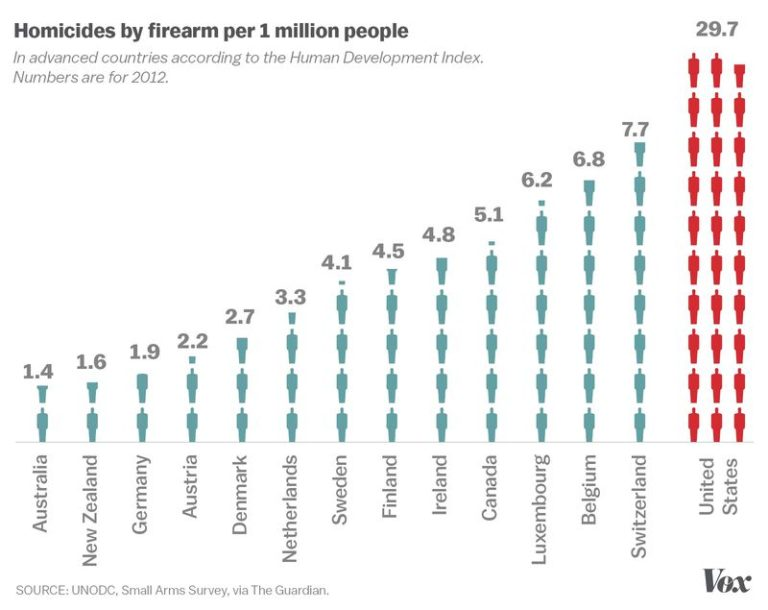

In [88]:
img_src="Fig-1-gun_homicides_developed_countries.jpg"

from IPython.display import Image
Image(filename='Fig-1-gun_homicides_developed_countries.jpg')

Claim Vox Article makes with the first graph (above graph): “America has six times as many firearm homicides as Canada, and nearly 16 times as many as Germany”. There is no explanation for why they compare only these 14 countries. There are a lot of developed countries which fall into this category and have potential homicides going on in there and even more. I found a related article here : http://www.oecdbetterlifeindex.org/topics/safety/. Also, there are 192 countries for which homicide data is available. So, now I want to express the deception hidden in this graph.


We can clearly see here that homicides rates across all countries for which data is available. There are issues of missing data and underreported information on homicides in many countries, the US homicide rate is less than the median rate and half of the mean for all countries.
Looking at the below graph we can infer that many countries does not report the homicides and USA is quite low compared to many countries as seen in the list.

Tableau Public: https://public.tableau.com/profile/priyanka6762#!/vizhome/IndividualProject-USAsGunViolenceProblem/Deceptive3?publish=yes

Tableau self account: https://us-west-2b.online.tableau.com/#/site/tableauforvisualizationgunviolence/workbooks/33409/views

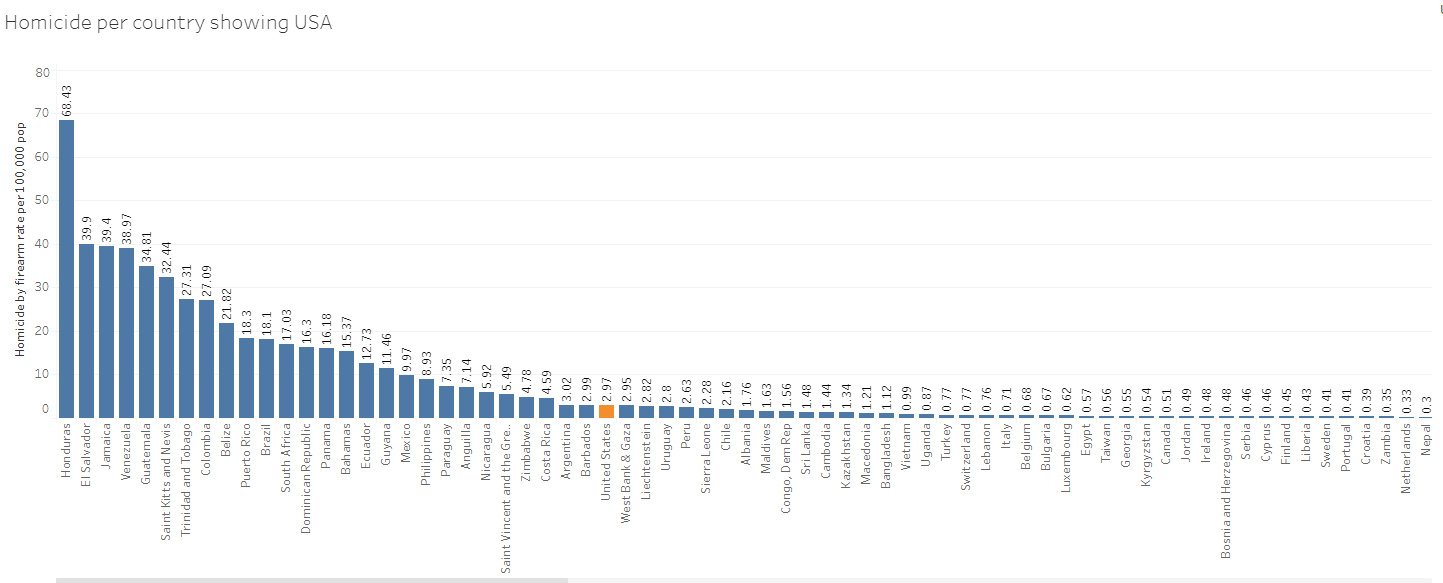

In [73]:
from IPython.display import Image
Image(filename='Homicides_1.png')


The USA homicide rate is high, though the most important question here is how homicide rates vary with gun ownership. Vox doesn’t deal with this. So, other than gun ownership, several factors might contribute to it. And, some countries have super huge homicide rates than USA which are ignored by the article. Probably to focus on an issue and make it eye catchy, the method is adopted. But a duty of a graph is to first render a clear and correct information than exagerated information. 

### Making of - Process in Tableau:

<ol>
  <li>I have used used Tableau to recreate the Graph 1 deceptive model.</li>
  <li>The graph which I have used to find a deceptive version is Vox Article Graph 1.</li>
  
  <p>So, here as a first step what I have done is I downloaded the dataset from CDC and Small Arms Survey site (Link provided in the data description part above) and tried to see Guns vs the homicides and tried going through some articles related to that. I found out that here at this point, some countries have been missed which whould make the data and information rendered by the chart different or I should say, less severe.
  </p>
  
  <li>So, as a next step: I create a new book in tableau, select Text file and upload my dataset which is on Gun homicides and firearm possessions "Dataviz_graphs".</li>
  <li> Now I read in the Country and firearm hiomicide rates and firearm possession rates. I try to see homicide by firarms country wise and see that though USA has a huge rate of firearm homicides still there are countries which have the number even bigger (Honduras). So, I try to add the labels to the bars to show the exact number I did that by selecting "Show labels". Also I added Country as  filter to just filter out some countries which are ranked as developed countries by Human Development Index official site information.</li>
  <li>Even after that I could see the claim which I provide above. So that explains my argument.</li>
  <li>Again I try to show it in a next sheet "Homicides in Developed Countries - Deceptive 1" so I can see the trend again. I try to show the data in sorted order. (Ascending to descending).</li> 
  <li>Also in support of my opinion I have made some basic calculations to see yhe mean, median of some column values. I have shown the calculation in Jypyter shells above. </li>
  
</ol>

# Deceptive Graph 2

Vox posted an analysis showing that more guns lead to more gun deaths as shown below.

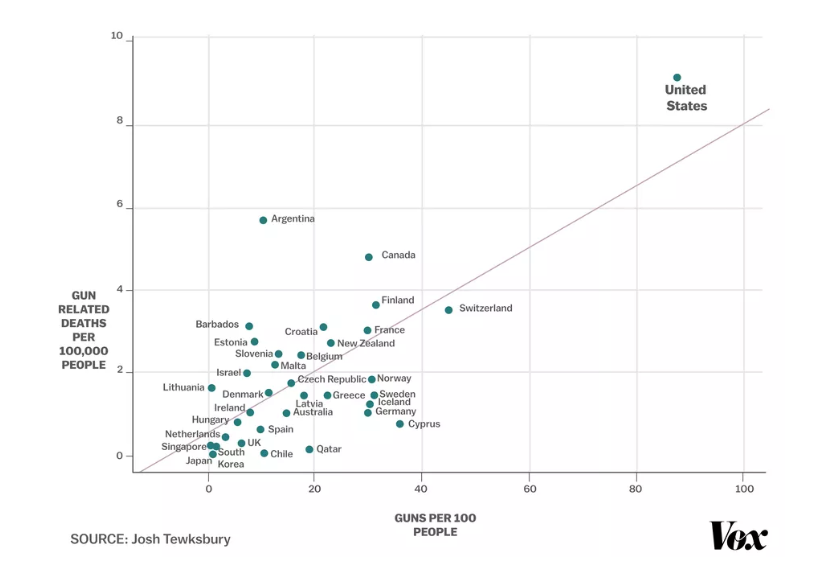

In [80]:
from IPython.display import Image
Image(filename='Capture_decep2.png')

 Whereas I agree that a lot of data supports the thesis that too many guns contributes to more gun deaths, gun availability isn’t the only thing that leads to gun deaths. Other factors are often more important. Otherwise the US would have the highest homicide rate in the world because the US has by far the most guns per capita.  I can’t figure out any simple rule that explains how they picked the nations they included in the above graph. Maybe tghe list of countries has been considered based on the source : http://www.oecd.org/about/membersandpartners/. 
 Also,  it should really include Panama and Uruguay which are richer than Argentina (which is included). 
 Data source is from the 2011 “Estimating Civilian Owned Firearms”
 In fact, it appears that gun availability is actually somewhat correlated with fewer gun deaths. I tried excluding all nations poorer than Spain, but it still doesn’t give much support to the thesis that more guns cause more homicides because there is little correlation again.

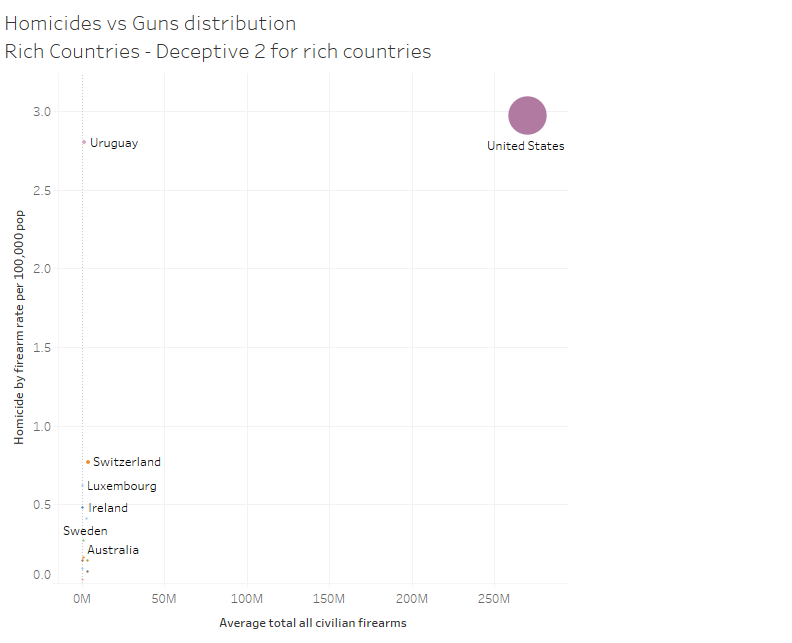

In [81]:
from IPython.display import Image
Image(filename='rich_deceptive2.png')

Basically, these are outliers, they should both probably be excluded. But again there is almost zero correlation between guns and homicides. That doesn’t mean that guns don’t contribute to the high homicide rate in the USA, but it just isn’t just that. Lots of other factors are also important such as environmental lead, criminal justice, inequality which are responsible for which data shgould be made available to come to a conclusion like this. Thus, just changing the list gives us altogether a different insight which I think is a deception.

Ref: http://www.nationmaster.com/country-info/stats/Crime/Violent-crime/Gun-crime/Guns-per-100-residents

### Making of - Process in Tableau:

<ol>
  <li>I have used used Tableau to recreate the Graph 1 deceptive model.</li>
  <li>The graph which I have used to find a deceptive version is Vox Article Graph 6. (Refer image above)</li>
  
  <p>So, here as a first step what I have done is I downloaded the dataset from CDC and Small Arms Survey site (Link provided in the data description part above) and tried to see Guns vs the homicides and tried going through some articles related to that. 
  </p>
  
  <li>So, as a next step: I create a new book in tableau, select Text file and upload my dataset which is on Gun homicides and firearm possessions "Dataviz_graphs".</li>
  <li> Now I read in the Country and firearm hiomicide rates and firearm possession rates for rich countries. I try to see homicide by firarms country wise and see that though USA has a huge rate of firearm homicides when I scale them based on total number of firearms (I add Column "Number of homicides by Firearms" to Size field)and then I see that USA has a big number in it and when I treat the column "Number of homicides by Firearms" and treat it with Gautemala and other countries, USA's homicide rate shows a less number </li>
  <li>So that explains my argument.</li>
  <li>Again I try to show it in a next sheet "Homicides in Richer Countries - Deceptive 2" so I can see the trend again.</li> 
  
</ol>

## Deceptive Graph 3

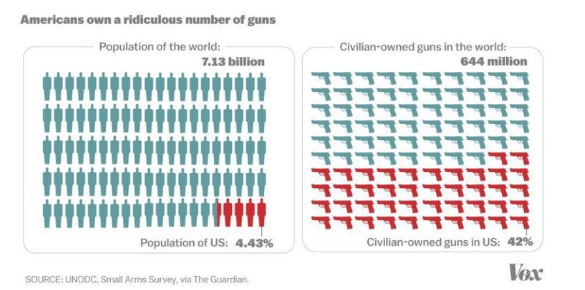

In [82]:
from IPython.display import Image
Image(filename='vox_3.png')

The Vox article mentions that  “America has 4.4 percent of the world’s population, but almost half of the civilian-owned guns around the world”, I have tried to measure world population and the distribution of firearms in the country and the USA. First of all, there is a huge difference hidden in the meaning of the terms, civilian-possessed guns than civilian-owned guns. Countries such as Israel, Switzerland have a lot more civilian-possessed guns than civilian-owned guns. Also, the deceptive version of the graph (below) shows the population distribution and the possession of arms. So, countries such as Cyprus for instance, has a population similar to Switzerland and its ranking in Gun possession is 6th. But, its average firearms ownership is so low. Which means they have to reconsider the variables "Average total firearms", "Civilian-possessed", "civilian-owned guns" to show a clear distribution. So, I assume they have even the gun possession rate higher than the gun ownership rate in the USA.  But there is a bigger accuracy problem in counting gun ownership using surveys or gun registration.  There is strong evidence that most guns are never registered.

There has been studies which says there are issues relted to gun possession and actual registration. Source: https://www.independent.co.uk/news/world/politics/switzerland-high-rates-gun-ownership-why-doesnt-no-mass-shootings-a8230606.html . Example: When Canada tried to register its estimated 15 million to 20 million long guns during the late 1990s, about 7 million were registered. 

Even in the US, there is evidence that surveys of gun ownership rates are not very accurate.  In many countries where gun ownership is illegal, surveys continually show zero gun ownership even when that is clearly not the case.

The bottom line is that the numbers of guns in the rest of the world is underestimated relative to the number in the United States.  So 42% is likely a huge overestimate of the US’s true share of guns worldwide which for me is deceptive in nature.

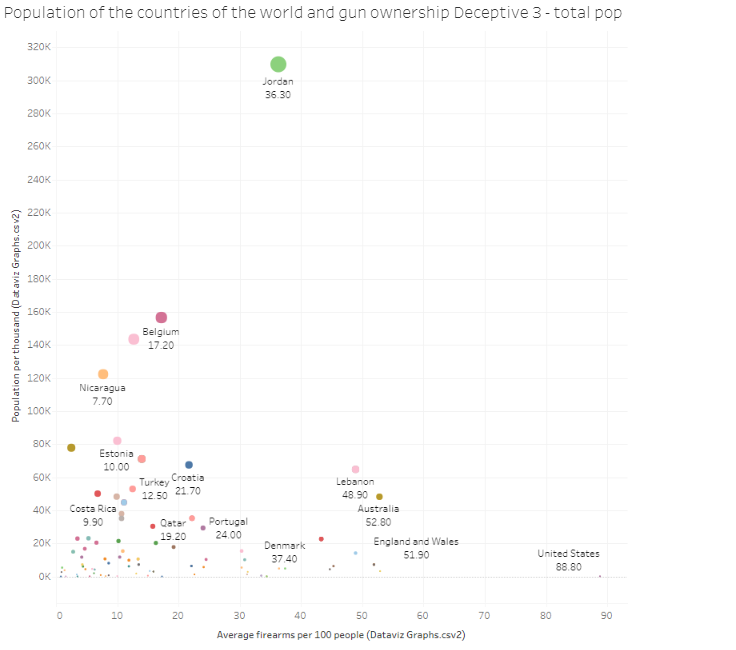

In [85]:
Image(filename='deceptive_3.png')

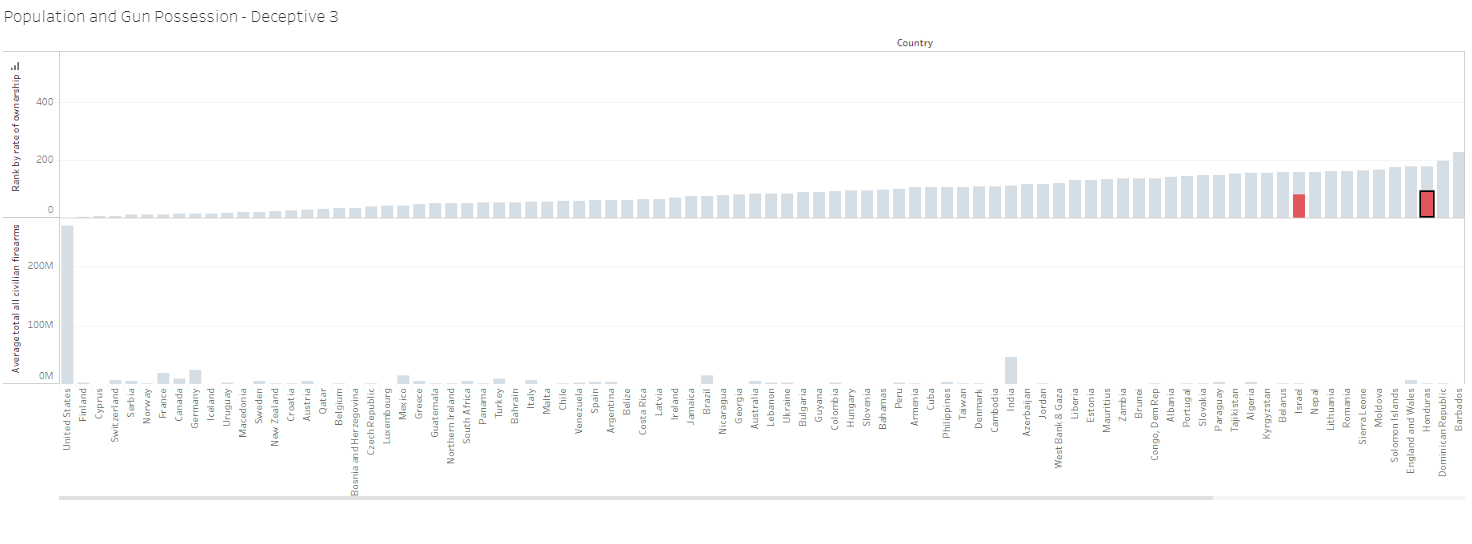

In [86]:
Image(filename='deceptive_3_1.png')

Showing Cyprus and Israel. The distribution says a lot about how the population and average firearm possession are some what not correct and potential causes of deception.

### Making of - Process in Tableau:

<ol>
  <li>I have used Tableau to recreate the Graph 3 deceptive model.</li>
  <li>The graph which I have used to find a deceptive version is Vox Article Graph 2.</li>
  
  <li>So, here as a first step what I have done is I downloaded the dataset from CDC and Small Arms Survey site (Link provided in the data description part above) and tried to see Guns vs the homicides and tried going through some articles related to that.</li> 
  <p>I found out that here at this point, I have world population data missing in the table which I would need to prove my point.
  I have tried to get world population data from wikipedia , Source : http://www.smallarmssurvey.org/fileadmin/docs/A-Yearbook/2007/en/Small-Arms-Survey-2007-Chapter-02-annexe-4-EN.pdf , https://data.worldbank.org/indicator/SP.POP.TOTL, https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations) </p>
  
  
  <li>So, as a next step: I create a new book in tableau, select Text file and upload my dataset which is on Gun homicides and firearm possessions "Dataviz_graphs".</li>
  <li> Now I tried to add population data and use that to make the Sheet :Deceptive 3 Graph. Also, here I try to show my argument by doing a highlight to the Country I want to focus. So, for that I created a legend which says if it is , for instance, USA, then its color is orange and is True and if it is not, its color is blue and value is False.
  </li>
  <li>I try to show how a country has a variation in population and how possession of total firearms depends/varies with that. I have made my argument based on this information. Even after that I could see the claim which I provide above. So that explains my argument.</li>
  <li>Again I try to show it in a next sheet "Deceptive 3 - Total pop"  which means total population wise how aI am trying to compare the same information. so I can see the trend again. I observe that some countries are big outliars and that can be because of missing data. Also, Australia, Switzerland they are quite close to USA but maybe beacuse of some laws or maybe other reasons, probably, the information is not correct. Also, time trend may vary the insight as suggested by the article: https://www.independent.co.uk/news/world/politics/switzerland-high-rates-gun-ownership-why-doesnt-no-mass-shootings-a8230606.html . </li> 
<li>Thus I think it is a deceptive version of the graph exagerating the fact to the viewers. I have used a scatter plot for the same</li>   
</ol>

Here is the link to Tableau public:
https://public.tableau.com/profile/priyanka6762#!/vizhome/IndividualProject-USAsGunViolenceProblem/Deceptive3?publish=yes
Tableau Individual Account link:
https://us-west-2b.online.tableau.com/#/site/tableauforvisualizationgunviolence/workbooks/33436/views

#### SCOPE FOR REVISION#############################################################

In [64]:
df2= pd.read_csv('Mass-shootings.csv')

Adding a column Percent and calculating % of firearm deaths.

In [66]:
df2['e'] = df2.sum(axis=1)

In [67]:
sumshoot = df2['e'].sum()

In [68]:
df2.sort_values(by='e', ascending=0, inplace = True)

In [69]:
df2['percent']= ''

In [70]:
df2['percent'] = (df2.e/sumshoot)*100

In [71]:
df2.sort_values(by='percent', ascending=0, inplace = True)

In [72]:
dfshoot = df2[0:30]

In [83]:
#sns.factorplot(x='State', y='e', data=dfshoot, aspect=5)

In [77]:
df2= pd.read_csv('Mass-shootings.csv', parse_dates = ['Incident Date'])

In [79]:
df2['year'] = df2['Incident Date'].dt.year
df2['loss'] = df2['# Killed'] + df2['# Injured']

### Scope for future enhancements

For graph 1 I think deception is expressed correctly and efficiently still I would want to give a try to use a map for it.

For graph 2 I still feel maybe regressing the variables could give me some coefficients which would make it meaningful and more informative. I would be able to remove or add variables using that. Maybe that would let me know what new variables I need to add so that the graph loos prettier and has good insight captured in it.

I would assume that the graphs that are created above show pretty much the idea and how it is deceptive but I would still think that  if for instance, in the graph 3, if I had two columns of data showing the civilian-gun ownership, civilian-gun possession and then maybe I would be able to give a more clear cut picture of the information.
Also, if I have some sources to show how countries where gun violence or gun ownership is very low but has a high criminal record, then how and why data is missing for that.